### Deliverable 1: Preprocessing the Data for a Neural Network

 ####  Import our dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# additional dependencies 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#### import the input dataser 

In [3]:

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# look at the data type 
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
#check the shape
application_df.shape

(34299, 12)

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(["EIN","NAME"], axis =1)


In [7]:
# check the shape
application_df.shape

(34299, 10)

####  Determine the number of unique values in each column.

In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

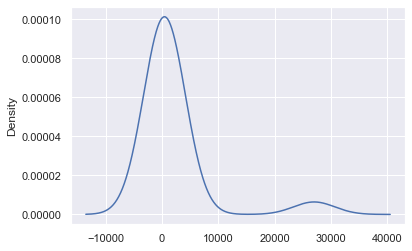

In [10]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [11]:
list(application_counts[application_counts<500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [12]:
# Determine which values to replace if counts are less than ...? less than 100
replace_appliaction = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_appliaction:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
class_counts =application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

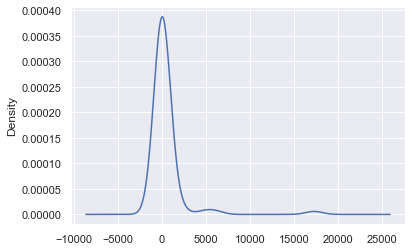

In [14]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [15]:
list(class_counts[class_counts<1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [16]:
# Determine which values to replace if counts are less than 1000..?
replace_class = list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [18]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [19]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [20]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Helanga\AppData\Local\Temp/ipykernel_27684/3710565482.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
application_df.shape

(34299, 44)

In [24]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T10          34299 non-null  float64
 5   APPLICATION_TYPE_T19          34299 non-null  float64
 6   APPLICATION_TYPE_T3           34299 non-null  float64
 7   APPLICATION_TYPE_T4           34299 non-null  float64
 8   APPLICATION_TYPE_T5           34299 non-null  float64
 9   APPLICATION_TYPE_T6           34299 non-null  float64
 10  APPLICATION_TYPE_T7           34299 non-null  float64
 11  APPLICATION_TYPE_T8           34299 non-null  float64
 12  AFFILIATION_CompanySponsored  34299 non-null  float64
 13  A

In [25]:
# Split our preprocessed data into our features and target arrays
# X is our feature matrix
X = application_df.drop(["IS_SUCCESSFUL"],1).values

y = application_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78)

C:\Users\Helanga\AppData\Local\Temp/ipykernel_27684/2586869407.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [27]:
#testing
len(X_train[0])

43

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 85
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()
# note from module 19.2.5 Rule of thumb:A good rule of thumb for a basic neural network
#is to have two to three times the amount of neurons in the hidden layer
# as the number of inputs

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 85)                3740      
                                                                 
 dense_1 (Dense)             (None, 50)                4300      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,091
Trainable params: 8,091
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoints path and file names
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#### Implement checkpint

In [37]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
check_point_path ="checkpoints/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [41]:
#Create a callback that save the model's weight every epoch(set 5)

cp_callback = ModelCheckpoint(
    filepath=check_point_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

##### Train the model

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 8:00 - loss: 0.6876 - accuracy: 0.4688
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 22s - loss: 0.6806 - accuracy: 0.5688 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 18/804 [..............................] - ETA: 7s - loss: 0.6541 - accuracy: 0.6372 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 6s - loss: 0.6287 - accuracy: 0.6741
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6164 - accuracy: 0.6859
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model 


Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5729 - accuracy: 0.7206
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5732 - accuracy: 0.7204
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7204
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7209
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving

148/804 [====>.........................] - ETA: 3s - loss: 0.5608 - accuracy: 0.7232
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5605 - accuracy: 0.7233
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7260
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5579 - accuracy: 0.7262
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7276
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\we


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5552 - accuracy: 0.7312
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5552 - accuracy: 0.7310
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5560 - accuracy: 0.7306
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5561 - accuracy: 0.7306
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving

327/804 [===========>..................] - ETA: 1s - loss: 0.5580 - accuracy: 0.7213
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5588 - accuracy: 0.7218
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5585 - accuracy: 0.7218
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5592 - accuracy: 0.7217
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5579 - ac

 13/804 [..............................] - ETA: 3s - loss: 0.5623 - accuracy: 0.7404
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7411
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5537 - accuracy: 0.7355
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7349
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 73/804 [=>.....


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5513 - accuracy: 0.7312
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5514 - accuracy: 0.7316
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5520 - accuracy: 0.7312
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5514 - accuracy: 0.7317
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving

187/804 [=====>........................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7301
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7286
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7280
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5550 - accuracy: 0.7266
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7278
Epoch 5: saving model to checkpoints\we


Epoch 5: saving model to checkpoints\weights.05.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5504 - accuracy: 0.7328
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5504 - accuracy: 0.7327
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5498 - accuracy: 0.7333
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5502 - accuracy: 0.7327
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving

360/804 [============>.................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7350
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7338
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7346
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5454 - accuracy: 0.7351
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [=======

 46/804 [>.............................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7317
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7264
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7319
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5483 - accuracy: 0.7318
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
106/804 [==>....

541/804 [===================>..........] - ETA: 0s - loss: 0.5498 - accuracy: 0.7326
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5494 - accuracy: 0.7323
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5499 - accuracy: 0.7316
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7322
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
601/804 [=======

222/804 [=======>......................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7334
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7334
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7331
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7350
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
282/804 [=======

692/804 [========================>.....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7336
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7329
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7329
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7325
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5463 - ac

373/804 [============>.................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7346
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7343
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5483 - accuracy: 0.7336
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5486 - accuracy: 0.7330
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
433/804 [=======

 44/804 [>.............................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7358
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7378
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7365
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7381
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
104/


Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7365
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7369
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7367
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7365
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7362
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7374
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7370
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7344
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7344
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7344
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7345
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5465 - accuracy: 0.7346
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo

321/804 [==========>...................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7366
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7372
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7374
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7383
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7382
Epoch 12: saving model to che

Epoch 13/100
  1/804 [..............................] - ETA: 2s - loss: 0.6191 - accuracy: 0.6875
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5998 - accuracy: 0.6745
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5620 - accuracy: 0.7095
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5580 - accuracy: 0.7106
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights

487/804 [=================>............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7367
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7366
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5436 - accuracy: 0.7372
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7374
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
547/


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7298
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7311
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7319
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7321
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epo


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5454 - accuracy: 0.7347
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7345
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5459 - accuracy: 0.7340
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7344
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epo


Epoch 15: saving model to checkpoints\weights.15.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7379
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7384
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7376
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7380
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo


Epoch 16: saving model to checkpoints\weights.16.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5490 - accuracy: 0.7458
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7365
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7403
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5484 - accuracy: 0.7389
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 70/

490/804 [=================>............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7388
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7391
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7386
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7382
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5425 - accuracy: 0.7371
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
540/804 [===================>.


Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7425
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7404
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7424
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7400
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epo

631/804 [======================>.......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7365
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5445 - accuracy: 0.7368
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5444 - accuracy: 0.7368
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5445 - accuracy: 0.7370
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5443 - accuracy: 0.7372
Epoch 17: saving model to che


Epoch 18: saving model to checkpoints\weights.18.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7370
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7367
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7361
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7360
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epo


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.7355
Epoch 18: saving model to checkpoints\weights.18.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5431 - accuracy: 0.7359
Epoch 19/100
  1/804 [..............................] - ETA: 1s - loss: 0.4529 - accuracy: 0.7500
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7428
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7488
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: s


Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7362
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7368
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7372
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7374
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
516/

114/804 [===>..........................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7423
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7429
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7388
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.5444 - accuracy: 0.7398
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7376
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
164/804 [=====>...............

579/804 [====================>.........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7350
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7349
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7352
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7352
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5443 - accuracy: 0.7354
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to che

231/804 [=======>......................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7327
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7303
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7287
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7298
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7316
Epoch 21: saving model to che


Epoch 21: saving model to checkpoints\weights.21.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7353
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7354
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7355
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5424 - accuracy: 0.7358
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5424 - accuracy: 0.7359
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to che


Epoch 22: saving model to checkpoints\weights.22.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7373
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7376
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7372
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7371
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
379/804 [=============>................] - ETA: 1s - loss: 

804/804 [==============================] - 4s 4ms/step - loss: 0.5421 - accuracy: 0.7380
Epoch 23/100
  1/804 [..............................] - ETA: 1s - loss: 0.8248 - accuracy: 0.5000
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5596 - accuracy: 0.7266
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7387
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5377 - accuracy: 0.7431
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 47/804 [>..


Epoch 23: saving model to checkpoints\weights.23.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7356
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5420 - accuracy: 0.7354
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7358
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7364
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7355
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to che

 98/804 [==>...........................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7481
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7450
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7421
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7423
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7412
Epoch 24: saving model to che

572/804 [====================>.........] - ETA: 1s - loss: 0.5428 - accuracy: 0.7378
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7380
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7378
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5421 - accuracy: 0.7375
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 


Epoch 25: saving model to checkpoints\weights.25.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7363
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7361
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7348
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7352
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
294/

693/804 [========================>.....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7381
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7380
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7372
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7378
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7377
Epoch 25: saving model to che


Epoch 26: saving model to checkpoints\weights.26.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7384
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7379
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7383
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7385
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
415/

 16/804 [..............................] - ETA: 3s - loss: 0.5194 - accuracy: 0.7578
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5270 - accuracy: 0.7540
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7418
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7346
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 

461/804 [================>.............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7365
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7368
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5430 - accuracy: 0.7369
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5443 - accuracy: 0.7359
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5449 - accuracy: 0.7354
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
511/804 [==================>..

 82/804 [==>...........................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7481
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7476
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7414
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7382
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7381
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to che


Epoch 28: saving model to checkpoints\weights.28.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7368
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7366
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7370
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7368
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7365
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to che

123/804 [===>..........................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7414
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
133/804 [===>..........................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7385
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7371
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7365
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7364
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
173/804 [=====>...............

558/804 [===================>..........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7366
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5436 - accuracy: 0.7366
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5428 - accuracy: 0.7373
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7371
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7380
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to che


Epoch 30: saving model to checkpoints\weights.30.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7399
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7397
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7412
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7422
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7409
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to che

619/804 [======================>.......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7378
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
669/804 [=====================


Epoch 31: saving model to checkpoints\weights.31.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7386
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7384
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7392
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7381
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7383
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che


Epoch 31: saving model to checkpoints\weights.31.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5412 - accuracy: 0.7376
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7383
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7380
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che

302/804 [==========>...................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7357
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7354
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7349
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7340
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7346
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
351/804 [============>........


Epoch 32: saving model to checkpoints\weights.32.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5393 - accuracy: 0.7387
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7384
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.7387
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5398 - accuracy: 0.7385
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5398 - accuracy: 0.7389
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to che

354/804 [============>.................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7334
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7334
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7335
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7339
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7351
Epoch 33: saving model to che

787/804 [============================>.] - ETA: 0s - loss: 0.5410 - accuracy: 0.7382
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.7385
Epoch 33: saving model to checkpoints\weights.33.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5404 - accuracy: 0.7385
Epoch 34/100
  1/804 [..............................] - ETA: 2s - loss: 0.4813 - accuracy: 0.8125
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7548
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7541
Epoch 34: saving model to checkpoints

398/804 [=============>................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7454
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7449
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.5354 - accuracy: 0.7463
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5360 - accuracy: 0.7455
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7441
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
448/804 [===============>.....


Epoch 35: saving model to checkpoints\weights.35.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7433
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7279
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7408
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7464
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7454
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to che

434/804 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7378
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7380
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7386
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7384
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7372
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
484/804 [=================>...


Epoch 36: saving model to checkpoints\weights.36.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7228
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.5456 - accuracy: 0.7204
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.5466 - accuracy: 0.7202
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7220
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.5437 - accuracy: 0.7268
Epoch 36: saving model to che


Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7401
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7403
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7409
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7400
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7400
Epoch 36: saving model to che

121/804 [===>..........................] - ETA: 4s - loss: 0.5299 - accuracy: 0.7510
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.5294 - accuracy: 0.7507
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7511
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7514
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7535
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
171/804 [=====>...............

541/804 [===================>..........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7409
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7408
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7407
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7410
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7403
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
591/804 [=====================

152/804 [====>.........................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7403
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7375
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7398
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7390
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7399
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
202/804 [======>..............


Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5419 - accuracy: 0.7383
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7379
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5422 - accuracy: 0.7378
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7380
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 


Epoch 39: saving model to checkpoints\weights.39.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7415
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7408
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7430
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7409
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7400
Epoch 39: saving model to che

658/804 [=======================>......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7397
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7394
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7398
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7401
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7403
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
708/804 [=====================

271/804 [=========>....................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7387
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7384
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7383
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7393
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7399
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to che


Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7408
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7403
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7403
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7404
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7405
Epoch 40: saving model to che

315/804 [==========>...................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7437
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7432
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7424
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7419
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7406
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
366/804 [============>........


Epoch 41: saving model to checkpoints\weights.41.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7405
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7404
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7404
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7400
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7401
Epoch 41: saving model to checkpoints\weights.41.hdf5
804/804 [=====================


Epoch 42: saving model to checkpoints\weights.42.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7371
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7382
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7382
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7382
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7378
Epoch 42: saving model to che

804/804 [==============================] - 4s 5ms/step - loss: 0.5393 - accuracy: 0.7389
Epoch 43/100
  1/804 [..............................] - ETA: 3s - loss: 0.3899 - accuracy: 0.8750
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5513 - accuracy: 0.7386
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.5435 - accuracy: 0.7390
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.5491 - accuracy: 0.7361
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.5541 - accuracy: 0.7255
Epoch 43: saving model to checkpoints

422/804 [==============>...............] - ETA: 2s - loss: 0.5383 - accuracy: 0.7394
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.5386 - accuracy: 0.7398
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7399
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7398
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7396
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to che


Epoch 44: saving model to checkpoints\weights.44.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 0.5190 - accuracy: 0.7617
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5162 - accuracy: 0.7592
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.5154 - accuracy: 0.7582
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5137 - accuracy: 0.7603
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 0.5129 - accuracy: 0.7611
Epoch 44: saving model to che

468/804 [================>.............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7465
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5335 - accuracy: 0.7466
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7460
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7446
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7449
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
518/804 [==================>..

 99/804 [==>...........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7374
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7385
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7389
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7397
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 


Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7368
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7371
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7370
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5414 - accuracy: 0.7368
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epo

210/804 [======>.......................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7353
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7344
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7336
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7332
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7352
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
260/804 [========>............

635/804 [======================>.......] - ETA: 0s - loss: 0.5402 - accuracy: 0.7379
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5407 - accuracy: 0.7377
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5410 - accuracy: 0.7374
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7382
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7386
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
685/804 [=====================


Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7410
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7401
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7401
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7396
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
360/

776/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7402
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7405
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5388 - accuracy: 0.7398
Epoch 48/100
  1/804 [..............................] - ETA: 2s - loss: 0.5161 - accuracy: 0.7188
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.4965 - accuracy: 0.7760
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 26/804 [...

434/804 [===============>..............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7390
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7390
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7394
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7395
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7403
Epoch 48: saving model to che

 83/804 [==>...........................] - ETA: 3s - loss: 0.5250 - accuracy: 0.7500
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 0.5249 - accuracy: 0.7519
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5262 - accuracy: 0.7483
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5252 - accuracy: 0.7508
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7489
Epoch 49: saving model to che

548/804 [===================>..........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7404
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7409
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7408
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7408
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7356
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7349
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7358
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7357
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 

649/804 [=======================>......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7396
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7397
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7399
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7400
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7404
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to che


Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7389
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7396
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7394
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7401
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
371/804 [============>.................] - ETA: 1s - loss: 

790/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7408
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5380 - accuracy: 0.7402
Epoch 52/100

Epoch 52: saving model to checkpoints\weights.52.hdf5
  1/804 [..............................] - ETA: 10s - loss: 0.4889 - accuracy: 0.7188
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7396 
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7308
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 38/804 [>

436/804 [===============>..............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7397
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7400
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7401
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7400
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
491/804 [=================>............] - ETA: 1s - loss: 


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7380
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7411
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7428
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7444
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epo

582/804 [====================>.........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7433
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7437
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7430
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7433
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
642/

218/804 [=======>......................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7404
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7404
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7411
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7409
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7415
Epoch 54: saving model to che


Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7406
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7409
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7405
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7399
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
748/

329/804 [===========>..................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7445
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7431
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7425
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7426
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7438
Epoch 55: saving model to che

804/804 [==============================] - 4s 5ms/step - loss: 0.5380 - accuracy: 0.7403
Epoch 56/100
  1/804 [..............................] - ETA: 1s - loss: 0.4254 - accuracy: 0.8750
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7354
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5552 - accuracy: 0.7250
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5511 - accuracy: 0.7273
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: s

470/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7437
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7437
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7424
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7432
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 


Epoch 57: saving model to checkpoints\weights.57.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7332
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.5443 - accuracy: 0.7324
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7308
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7331
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7344
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to che

576/804 [====================>.........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7393
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7397
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7402
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7406
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7407
Epoch 57: saving model to che

246/804 [========>.....................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7373
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7384
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7375
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7378
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7381
Epoch 58: saving model to che


Epoch 58: saving model to checkpoints\weights.58.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7399
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7398
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7404
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7400
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
767/


Epoch 59: saving model to checkpoints\weights.59.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7414
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7407
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7407
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7409
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epo


Epoch 60: saving model to checkpoints\weights.60.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.5264 - accuracy: 0.7404
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.5232 - accuracy: 0.7436
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5298 - accuracy: 0.7380
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.5271 - accuracy: 0.7401
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 


Epoch 60: saving model to checkpoints\weights.60.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7427
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5353 - accuracy: 0.7433
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7424
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7423
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 

135/804 [====>.........................] - ETA: 3s - loss: 0.5448 - accuracy: 0.7389
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7384
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7377
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7369
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7372
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to che

605/804 [=====================>........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7407
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7403
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7403
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7399
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 

271/804 [=========>....................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7408
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7415
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7433
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7435
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 

721/804 [=========================>....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7410
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7412
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7412
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7410
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7407
Epoch 62: saving model to che


Epoch 63: saving model to checkpoints\weights.63.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7411
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7407
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7405
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7394
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 


Epoch 64: saving model to checkpoints\weights.64.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5231 - accuracy: 0.7615
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7583
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7558
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7536
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 93/


Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5346 - accuracy: 0.7425
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7422
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5345 - accuracy: 0.7429
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7425
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epo

164/804 [=====>........................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7369
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7346
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7361
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7374
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7388
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
214/804 [======>..............


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7416
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7415
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7409
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7407
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
674/

275/804 [=========>....................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7391
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7405
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7398
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7415
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7413
Epoch 66: saving model to che


Epoch 66: saving model to checkpoints\weights.66.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7396
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7398
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7399
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5377 - accuracy: 0.7402
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
785/

386/804 [=============>................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7428
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7420
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7426
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7428
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 

 52/804 [>.............................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7416
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7463
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5298 - accuracy: 0.7481
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5309 - accuracy: 0.7455
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
112/

512/804 [==================>...........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7371
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7362
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7362
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7366
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7368
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
562/804 [===================>.


Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7468
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7432
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7416
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7429
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
212/

614/804 [=====================>........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7393
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7390
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7392
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7393
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5364 - accuracy: 0.7398
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to che


Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7371
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7381
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7370
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7381
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
322/

734/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7405
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7409
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7407
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7410
Epoch 70: saving model to che

365/804 [============>.................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7395
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7390
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7385
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.5383 - accuracy: 0.7388
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7393
Epoch 71: saving model to che

 11/804 [..............................] - ETA: 4s - loss: 0.5852 - accuracy: 0.6989 
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5763 - accuracy: 0.7083
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5634 - accuracy: 0.7188
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.5553 - accuracy: 0.7309
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5525 - accuracy: 0.7347
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 61/804 [=>..................

461/804 [================>.............] - ETA: 1s - loss: 0.5400 - accuracy: 0.7395
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7389
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7395
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7402
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 


Epoch 73: saving model to checkpoints\weights.73.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7398
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7393
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7386
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7410
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 

607/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7444
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7439
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7431
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7426
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7422
Epoch 73: saving model to che

263/804 [========>.....................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7457
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7438
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7431
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7431
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7438
Epoch 74: saving model to che

723/804 [=========================>....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7403
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7404
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7410
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7405
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7406
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to che


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7408
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7415
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7415
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7414
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo

 55/804 [=>............................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7295
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7262
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7285
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7329
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7419
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5324 - accuracy: 0.7423
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5333 - accuracy: 0.7415
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7411
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
550/


Epoch 77: saving model to checkpoints\weights.77.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7337
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7374
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7375
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7394
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 


Epoch 77: saving model to checkpoints\weights.77.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7409
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7413
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7416
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7418
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epo

292/804 [=========>....................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7396
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7384
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7393
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7389
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7385
Epoch 78: saving model to che


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7411
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7409
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7413
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7404
Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 4s 5ms/step - lo

417/804 [==============>...............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7407
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7404
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7403
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7392
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
468/804 [================>.............] - ETA: 1s - loss: 

 74/804 [=>............................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7454
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7423
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7401
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7405
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 


Epoch 80: saving model to checkpoints\weights.80.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7416
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7413
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7416
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7415
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
569/

165/804 [=====>........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7460
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7479
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7469
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7470
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7467
Epoch 81: saving model to che


Epoch 81: saving model to checkpoints\weights.81.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7388
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7399
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7396
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7396
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 

278/804 [=========>....................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7430
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7434
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7427
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7422
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 

751/804 [===========================>..] - ETA: 0s - loss: 0.5364 - accuracy: 0.7402
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7398
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7403
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7404
Epoch 82: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5362 - accuracy: 0.7404
Epoch 83/100
  1/804 [...

421/804 [==============>...............] - ETA: 1s - loss: 0.5306 - accuracy: 0.7450
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5312 - accuracy: 0.7444
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7436
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7430
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5326 - accuracy: 0.7429
Epoch 83: saving model to che

 88/804 [==>...........................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7340
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7400
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7383
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7383
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 


Epoch 84: saving model to checkpoints\weights.84.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5358 - accuracy: 0.7419
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7421
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7421
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7422
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 

229/804 [=======>......................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7415
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7419
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7431
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7456
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7465
Epoch 85: saving model to che

704/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7393
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7396
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5383 - accuracy: 0.7390
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5389 - accuracy: 0.7386
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7392
Epoch 85: saving model to che

370/804 [============>.................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7394
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7378
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7392
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7382
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7380
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to che

 31/804 [>.............................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7319
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7347
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7411
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7429
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7434
Epoch 87: saving model to che

506/804 [=================>............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7355
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5404 - accuracy: 0.7364
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7369
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7375
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 

167/804 [=====>........................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7304
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7299
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7329
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7335
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 

647/804 [=======================>......] - ETA: 0s - loss: 0.5366 - accuracy: 0.7420
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7417
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7411
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7414
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
707/

327/804 [===========>..................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7417
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7413
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7430
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7431
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
378/804 [=============>................] - ETA: 1s - loss: 


Epoch 89: saving model to checkpoints\weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7412
Epoch 89: saving model to checkpoints\weights.89.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5357 - accuracy: 0.7411
Epoch 90/100
  1/804 [..............................] - ETA: 2s - loss: 0.4319 - accuracy: 0.8125
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7210
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7419
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 39/804 [>..


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7390
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7392
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7386
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7389
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
523/

130/804 [===>..........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7409
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7390
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7400
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7428
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 


Epoch 91: saving model to checkpoints\weights.91.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7423
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7417
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7405
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5358 - accuracy: 0.7411
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
670/

284/804 [=========>....................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7433
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7439
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7442
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.5282 - accuracy: 0.7439
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 


Epoch 92: saving model to checkpoints\weights.92.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.7407
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7409
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7409
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5344 - accuracy: 0.7414
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7407
Epoch 92: saving model to che

371/804 [============>.................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7479
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7480
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7482
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5292 - accuracy: 0.7473
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7469
Epoch 93: saving model to che

 13/804 [..............................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7476
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7422
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5339 - accuracy: 0.7391
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7369
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 

488/804 [=================>............] - ETA: 1s - loss: 0.5313 - accuracy: 0.7465
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5308 - accuracy: 0.7466
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5311 - accuracy: 0.7464
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5310 - accuracy: 0.7460
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 

149/804 [====>.........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7433
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7403
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7399
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7395
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 

616/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7422
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7419
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7423
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7427
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7431
Epoch 95: saving model to che

270/804 [=========>....................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7419
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7421
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7417
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7407
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 

740/804 [==========================>...] - ETA: 0s - loss: 0.5356 - accuracy: 0.7416
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7411
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7411
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7410
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
795/804 [============================>.] - ETA: 0s - loss: 


Epoch 97: saving model to checkpoints\weights.97.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7392
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7382
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7382
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7376
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
465/804 [================>.............] - ETA: 1s - loss: 

 82/804 [==>...........................] - ETA: 3s - loss: 0.5230 - accuracy: 0.7519
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5207 - accuracy: 0.7558
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5184 - accuracy: 0.7568
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.5183 - accuracy: 0.7572
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.5247 - accuracy: 0.7519
Epoch 98: saving model to che

553/804 [===================>..........] - ETA: 1s - loss: 0.5319 - accuracy: 0.7426
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5326 - accuracy: 0.7421
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7411
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7414
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 


Epoch 99: saving model to checkpoints\weights.99.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7435
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7442
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7427
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7415
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 


Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7408
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7407
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7406
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7408
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
743/


Epoch 100: saving model to checkpoints\weights.100.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7455
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7458
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7462
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7440
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoin

794/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7416
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5353 - accuracy: 0.7415


##### Evaluate the model(for loss and accuracy)using the test data

<AxesSubplot:>

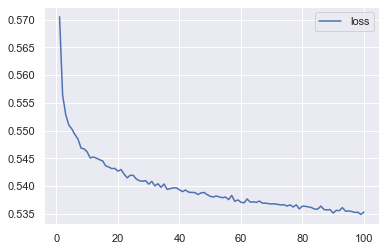

In [43]:
# Create a Dataframe using containing tarining history
history_df = pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

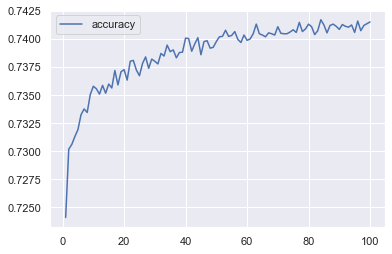

In [45]:
#plot the accuracy
history_df.plot(y="accuracy")

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5567 - accuracy: 0.7254 - 309ms/epoch - 1ms/step
Loss: 0.5566698908805847, Accuracy: 0.7253644466400146


#### save the model

In [47]:
#Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity.h5")